# Swing Decision Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

## Load Datasets

In [9]:
df_bat = pd.read_csv('bat-tracking.csv')
df_ev = pd.read_csv('exit_velocity.csv')
df_stats = pd.read_csv('stats.csv')

df_bat = df_bat.rename(columns={'id': 'player_id'})

print(f"Bat Tracking: {df_bat.shape}")
print(f"Exit Velocity: {df_ev.shape}")
print(f"Plate Discipline (Stats): {df_stats.shape}")

Bat Tracking: (226, 18)
Exit Velocity: (251, 18)
Plate Discipline (Stats): (144, 7)


In [44]:
df_bat.head()

,player_id,name,swings_competitive,percent_swings_competitive,contact,avg_bat_speed,hard_swing_rate,squared_up_per_bat_contact,squared_up_per_swing,blast_per_bat_contact,blast_per_swing,swing_length,swords,batter_run_value,whiffs,whiff_per_swing,batted_ball_events,batted_ball_event_per_swing
0,665833,"Cruz, Oneil",818,0.905869,553,78.789158,0.783619,0.323689,0.218826,0.247740,0.167482,7.760678,19,-21.060730,265,0.323961,271,0.331296
1,691406,"Caminero, Junior",1090,0.906822,839,78.539182,0.811009,0.290822,0.223853,0.224076,0.172477,8.417281,21,2.374002,251,0.230275,427,0.391743
2,691023,"Walker, Jordan",686,0.905013,465,78.069258,0.778426,0.266667,0.180758,0.200000,0.135569,8.258906,21,-19.146261,221,0.322157,231,0.336735
3,666176,"Adell, Jo",1032,0.902887,779,77.613888,0.733527,0.261874,0.197674,0.191271,0.144380,7.728556,30,0.667368,253,0.245155,354,0.343023
4,656941,"Schwarber, Kyle",1141,0.899842,807,77.337696,0.772130,0.322181,0.227870,0.246592,0.174408,7.531079,51,10.851018,334,0.292726,385,0.337423


In [11]:
df_stats.head()

,"last_name, first_name",player_id,year,z_swing_percent,oz_swing_percent,meatball_swing_percent,whiff_percent
0,"Springer, George",543807,2025,71.0,20.4,86.7,26.1
1,"Reynolds, Bryan",668804,2025,73.4,26.0,83.8,29.4
2,"Busch, Michael",683737,2025,68.5,23.1,77.8,25.1
3,"Soderstrom, Tyler",691016,2025,68.3,28.7,80.9,25.4
4,"Rafaela, Ceddanne",678882,2025,75.3,42.2,83.1,26.8


In [12]:
df_ev.head()

,"last_name, first_name",player_id,attempts,avg_hit_angle,anglesweetspotpercent,max_hit_speed,avg_hit_speed,ev50,fbld,gb,max_distance,avg_distance,avg_hr_distance,ev95plus,ev95percent,barrels,brl_percent,brl_pa
0,"Arraez, Luis",650333,618,12.2,36.9,107.8,86.1,93.6,87.6,85.1,402,152,370.0,103,16.7,7,1.1,1.0
1,"Kwan, Steven",680757,575,15.6,39.3,104.2,86.2,94.4,87.8,85.1,431,167,381.0,111,19.3,11,1.9,1.6
2,"Hoerner, Nico",663538,554,12.5,36.1,108.1,86.7,96.7,89.3,85.8,412,155,379.0,168,30.3,13,2.3,2.0
3,"Perdomo, Geraldo",672695,533,15.5,36.0,108.2,87.6,97.4,90.3,86.6,423,165,393.0,170,31.9,33,6.2,4.6
4,"Betts, Mookie",605141,531,18.0,37.7,108.4,89.1,98.1,91.6,86.0,412,191,390.0,190,35.8,29,5.5,4.4


## Data Processing

In [14]:
merged_df = pd.merge(df_stats, df_ev, on='player_id', how='inner', suffixes=('', '_ev'))

final_df = pd.merge(merged_df, df_bat, on='player_id', how='inner', suffixes=('', '_bt'))

cols_to_keep = [
    'player_id', 'last_name, first_name', 
    'avg_bat_speed', 'swing_length', 'squared_up_per_swing', 'blast_per_swing',
    'z_swing_percent', 'oz_swing_percent', 'whiff_percent', 'meatball_swing_percent',
    'avg_hit_speed', 'ev95percent', 'brl_percent'
]
final_df = final_df[cols_to_keep]

In [15]:
final_df.head()

,player_id,"last_name, first_name",avg_bat_speed,swing_length,squared_up_per_swing,blast_per_swing,z_swing_percent,oz_swing_percent,whiff_percent,meatball_swing_percent,avg_hit_speed,ev95percent,brl_percent
0,543807,"Springer, George",73.743485,7.500359,0.246204,0.139913,71.0,20.4,26.1,86.7,90.0,47.6,16.1
1,668804,"Reynolds, Bryan",72.221865,6.947734,0.240660,0.119896,73.4,26.0,29.4,83.8,91.2,46.0,10.1
2,683737,"Busch, Michael",69.634582,7.024826,0.289054,0.130712,68.5,23.1,25.1,77.8,92.2,47.3,17.1
3,691016,"Soderstrom, Tyler",73.960501,7.481179,0.251303,0.158498,68.3,28.7,25.4,80.9,91.6,49.8,11.4
4,678882,"Rafaela, Ceddanne",71.017957,7.450741,0.242754,0.104167,75.3,42.2,26.8,83.1,88.3,38.7,9.2


## Feature Engineering

In [16]:
# 1. Plate Discipline Score:
final_df['discipline_score'] = final_df['z_swing_percent'] - final_df['oz_swing_percent']

# 2. Power Efficiency:
final_df['power_efficiency'] = final_df['avg_hit_speed'] / final_df['avg_bat_speed']

if final_df.isnull().values.any():
    print("Processing NULL values...")
    final_df = final_df.dropna()

final_df[['last_name, first_name', 'discipline_score', 'power_efficiency']].head()

,"last_name, first_name",discipline_score,power_efficiency
0,"Springer, George",50.6,1.220447
1,"Reynolds, Bryan",47.4,1.262775
2,"Busch, Michael",45.4,1.324055
3,"Soderstrom, Tyler",39.6,1.238499
4,"Rafaela, Ceddanne",33.1,1.243348


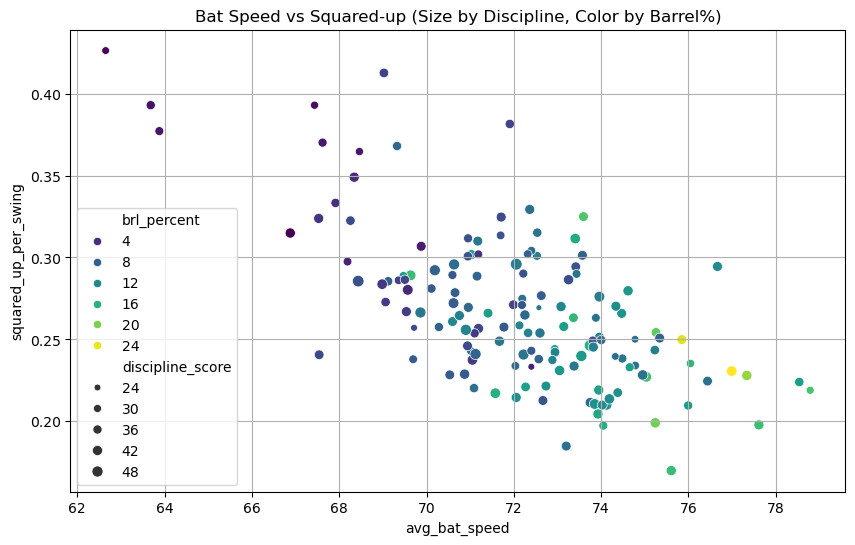

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='avg_bat_speed', y='squared_up_per_swing', 
                size='discipline_score', hue='brl_percent', palette='viridis')
plt.title('Bat Speed vs Squared-up (Size by Discipline, Color by Barrel%)')
plt.grid(True)
plt.show()

## Data Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

# Define features for clustering
features = [
    'avg_bat_speed', 'swing_length', 'squared_up_per_swing', 'blast_per_swing',
    'z_swing_percent', 'oz_swing_percent', 'whiff_percent', 'meatball_swing_percent',
    'avg_hit_speed', 'ev95percent', 'brl_percent', 'discipline_score', 'power_efficiency'
]

# Extract data to be scaled
X = final_df[features]

# Initialize and apply scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame for scaled data to keep track of columns
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
print("Data scaling complete. Sample of scaled features:")
X_scaled_df.head()

Data scaling complete. Sample of scaled features:


,avg_bat_speed,swing_length,squared_up_per_swing,blast_per_swing,z_swing_percent,oz_swing_percent,whiff_percent,meatball_swing_percent,avg_hit_speed,ev95percent,brl_percent,discipline_score,power_efficiency
0,0.621731,0.440492,-0.464877,0.503836,0.748126,-1.257423,0.381369,1.526106,-0.027714,0.565672,1.390966,2.218206,-0.941640
1,0.052863,-0.982793,-0.584944,-0.120046,1.166225,-0.307642,0.931540,1.105500,0.529144,0.359778,0.052665,1.611949,0.391379
2,-0.914410,-0.784244,0.463204,0.217063,0.312606,-0.799493,0.214650,0.235281,0.993193,0.527067,1.614016,1.233038,2.321191
3,0.702864,0.391093,-0.354428,1.083079,0.277765,0.150288,0.264666,0.684894,0.714764,0.848776,0.342630,0.134197,-0.373141
4,-0.397226,0.312700,-0.539606,-0.610272,1.497220,2.439938,0.498071,1.003974,-0.816597,-0.579613,-0.148081,-1.097262,-0.220449


## Elbow Method (Find the optimal K)

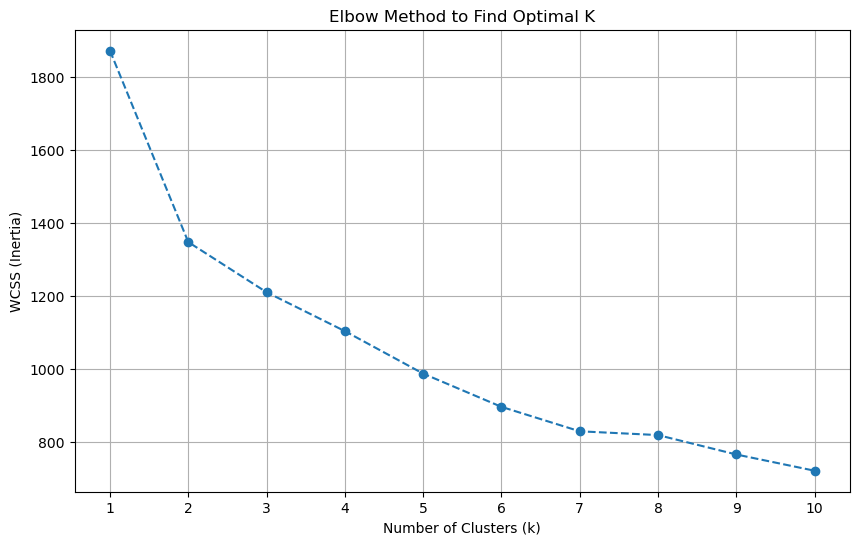

In [19]:
from sklearn.cluster import KMeans

wcss = []
k_range = range(1, 11)

# Iterate through different k values
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Find Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

## K-Means Clustering

In [35]:
optimal_k = 5

# Apply KMeans
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels back to the original dataframe
final_df['cluster'] = cluster_labels

# Show player counts in each cluster
print("Player count per cluster:")
print(final_df['cluster'].value_counts().sort_index())

# Calculate mean values for each cluster to understand their profiles
cluster_profiles = final_df.groupby('cluster').mean(numeric_only=True)

# Focus on key descriptive features
analysis_cols = [
    'avg_bat_speed', 'swing_length', 'discipline_score', 
    'brl_percent', 'whiff_percent', 'ev95percent'
]
print("Cluster Profiles (Mean Values):")
cluster_profiles[analysis_cols]

Player count per cluster:
cluster
0    45
1    43
2    28
3     4
4    24
Name: count, dtype: int64
Cluster Profiles (Mean Values):


,avg_bat_speed,swing_length,discipline_score,brl_percent,whiff_percent,ev95percent
cluster,,,,,,
0,74.249466,7.554020,42.240000,13.637778,28.797778,48.555556
1,72.501769,7.270881,38.874419,10.420930,23.413953,46.388372
2,69.510900,7.065512,37.957143,4.992857,17.896429,33.767857
3,64.410776,6.236264,32.400000,1.700000,9.150000,24.200000
4,71.534863,7.502705,34.816667,8.833333,24.525000,41.641667


## Visualization

In [71]:
from sklearn.metrics import pairwise_distances_argmin_min

# Find the index of the player closest to each cluster centroid
closest_idx, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X_scaled)

for i in range(optimal_k):
    print(f"\nTop 10 Players in Cluster {i}:")
    print(final_df[final_df['cluster'] == i]['last_name, first_name'].head(10).tolist())


Top 10 Players in Cluster 0:
['Springer, George', 'Reynolds, Bryan', 'Soderstrom, Tyler', 'Contreras, Willson', 'Cruz, Oneil', 'Tatis Jr., Fernando', 'Adames, Willy', 'Langeliers, Shea', 'Walker, Christian', 'Tucker, Kyle']

Top 10 Players in Cluster 1:
['Busch, Michael', 'Correa, Carlos', 'Sheets, Gavin', 'Nimmo, Brandon', 'Ward, Taylor', 'Goldschmidt, Paul', 'Ramos, Heliot', 'Neto, Zach', 'Wagaman, Eric', 'Garcia, Maikel']

Top 10 Players in Cluster 2:
['Durbin, Caleb', 'Hoerner, Nico', 'Stott, Bryson', 'Crawford, J.P.', 'Ortiz, Joey', 'Winn, Masyn', 'Cronenworth, Jake', 'Frelick, Sal', 'Smith, Josh', 'Betts, Mookie']

Top 10 Players in Cluster 3:
['Wilson, Jacob', 'Meidroth, Chase', 'Kwan, Steven', 'Arraez, Luis']

Top 10 Players in Cluster 4:
['Rafaela, Ceddanne', 'Bichette, Bo', 'Story, Trevor', 'Turner, Trea', 'Perez, Salvador', 'Realmuto, J.T.', 'Castellanos, Nick', 'García, Adolis', 'Albies, Ozzie', 'Crow-Armstrong, Pete']


In [69]:
import plotly.graph_objects as go

# 1. Normalize cluster_profiles for visualization (scale to 0-1)
profile_norm = (cluster_profiles - cluster_profiles.min()) / (cluster_profiles.max() - cluster_profiles.min())

# 2. Select key features for the radar chart
categories = ['avg_bat_speed', 'discipline_score', 'whiff_percent', 'brl_percent', 'ev95percent']

fig = go.Figure()

for i in range(len(profile_norm)):
    fig.add_trace(go.Scatterpolar(
        r=profile_norm.loc[i, categories].values,
        theta=categories,
        fill='toself',
        opacity=0.8,
        name=f'Cluster {i}'
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    showlegend=True,
    title="Comparison of Player Profiles by Cluster"
)

fig.show()

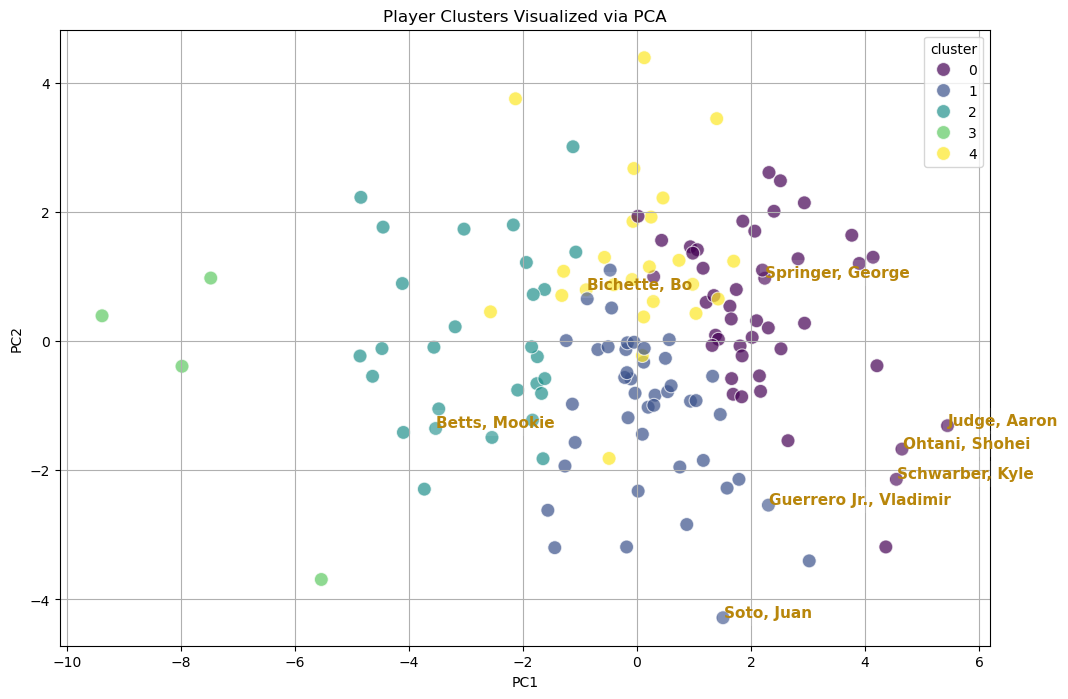

In [121]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = final_df['cluster'].values
pca_df['name'] = final_df['last_name, first_name'].values

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='viridis', s=100, alpha=0.7)

stars_to_label = ['Judge, Aaron', 'Ohtani, Shohei', 'Soto, Juan', 'Guerrero Jr., Vladimir', 'Schwarber, Kyle', 'Springer, George', 'Betts, Mookie', 'Bichette, Bo']
stars_pca = pca_df[pca_df["name"].isin(stars_to_label)]

for i, row in stars_pca.iterrows():
    plt.text(row['PC1'] + 0.01, row['PC2'] + 0.01, row['name'], 
             fontsize=11, fontweight='bold', color='darkgoldenrod', 
             bbox=dict(facecolor='white', alpha=0.1, edgecolor='none'))

plt.title('Player Clusters Visualized via PCA')
plt.grid(True)
plt.show()

In [70]:
# PC1/PC2 component weights
components = pd.DataFrame(
    pca.components_.T,
    index=features,
    columns=["PC1_weight", "PC2_weight"],
).sort_values("PC1_weight", key=lambda s: s.abs(), ascending=False)

display(components)

loadings = pd.DataFrame(
    pca.components_.T * np.sqrt(pca.explained_variance_),
    index=features,
    columns=["PC1_loading", "PC2_loading"],
).sort_values("PC1_loading", key=lambda s: s.abs(), ascending=False)

display(loadings)

print("Explained variance ratio:", pca.explained_variance_ratio_)

,PC1_weight,PC2_weight
avg_bat_speed,0.378721,-0.122597
ev95percent,0.364637,-0.196428
brl_percent,0.347406,-0.096245
whiff_percent,0.342985,0.121306
avg_hit_speed,0.330105,-0.230285
squared_up_per_swing,-0.300487,-0.184772
blast_per_swing,0.288592,-0.309271
swing_length,0.284491,0.053397
power_efficiency,-0.252131,-0.036719
meatball_swing_percent,0.147442,0.490179


,PC1_loading,PC2_loading
avg_bat_speed,0.928731,-0.188188
ev95percent,0.894192,-0.301519
brl_percent,0.851937,-0.147736
whiff_percent,0.841095,0.186206
avg_hit_speed,0.809511,-0.353489
squared_up_per_swing,-0.736878,-0.283626
blast_per_swing,0.707708,-0.474733
swing_length,0.697651,0.081965
power_efficiency,-0.618296,-0.056365
meatball_swing_percent,0.361569,0.752428


Explained variance ratio: [0.45937904 0.17999087]


In [34]:
stars = ['Judge, Aaron', 'Soto, Juan', 'Guerrero Jr., Vladimir', 'Ohtani, Shohei', 'Stanton, Giancarlo', 'Schwarber, Kyle', 'Harper, Bryce','Arraez, Luis', 'Kwan, Steven', 'Bichette, Bo', 'Cruz, Oneil', 'Springer, George']
present_stars = final_df[final_df['last_name, first_name'].isin(stars)]
print(present_stars[['last_name, first_name', 'cluster']])

      last_name, first_name  cluster
0          Springer, George        0
7              Bichette, Bo        4
13              Cruz, Oneil        0
62               Soto, Juan        1
72             Judge, Aaron        0
79          Schwarber, Kyle        0
103            Kwan, Steven        3
112           Harper, Bryce        0
116            Arraez, Luis        3
133  Guerrero Jr., Vladimir        1
134          Ohtani, Shohei        0


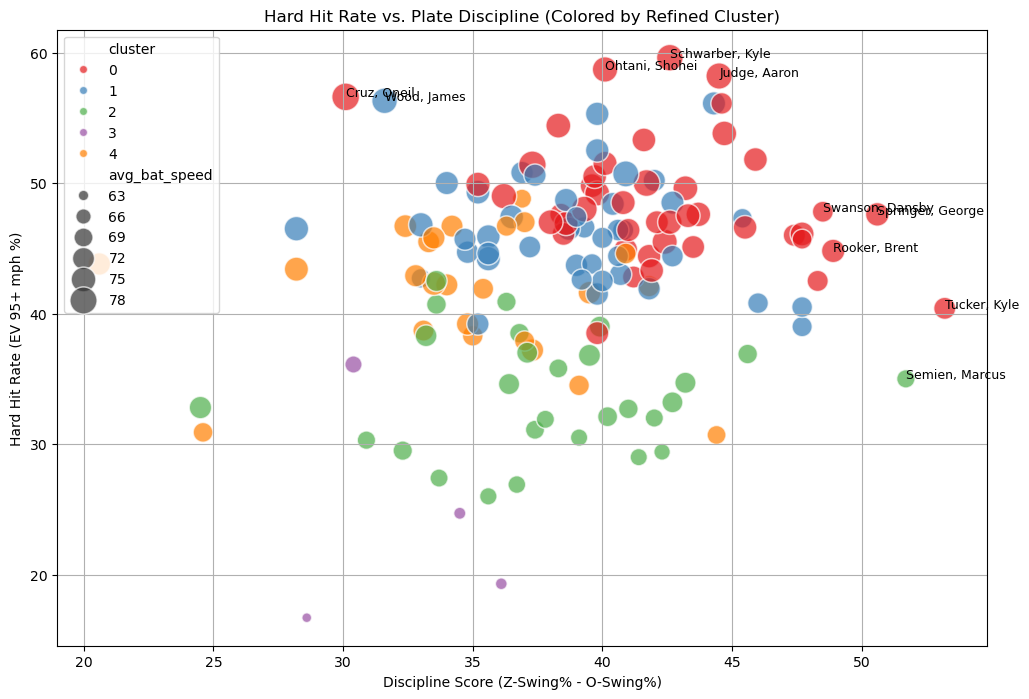

In [41]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=final_df, 
    x='discipline_score', 
    y='ev95percent', 
    hue='cluster', 
    size='avg_bat_speed',
    palette='Set1', 
    alpha=0.7,
    sizes=(50, 400)
)

# Annotate Top Players to see if the insights match
# Let's find top hard hitters and top disciplined hitters
top_players = pd.concat(
    [
        final_df.nlargest(5, "ev95percent"),
        final_df.nlargest(5, "discipline_score"),
    ],
    ignore_index=True,
).drop_duplicates(subset=["player_id"])
for i, row in top_players.iterrows():
    plt.text(row['discipline_score'], row['ev95percent'], row['last_name, first_name'], fontsize=9)

plt.title('Hard Hit Rate vs. Plate Discipline (Colored by Refined Cluster)')
plt.xlabel('Discipline Score (Z-Swing% - O-Swing%)')
plt.ylabel('Hard Hit Rate (EV 95+ mph %)')
plt.grid(True)
plt.show()

## Cost of Chase Analysis


### 1. Define 'Chase Efficiency'
This measures how much 'Hard hit' production a player gets relative to their chase rate.
A higher score means their chases are more productive or they offset chases with elite power.

In [46]:
final_df['chase_efficiency'] = final_df['ev95percent'] / (final_df['oz_swing_percent'] / 100)

### 2. Identify 'Bad Ball Hitters' (High Chase, but High Hard Hit)
We look for players above mean in Chase but also above mean in Powe

In [62]:
mean_chase = final_df['oz_swing_percent'].mean()
mean_power = final_df['ev95percent'].mean()

# Top-Left: Discipline < mean, Power > mean (The Elite)
top_left_candidates = final_df[(final_df['oz_swing_percent'] < mean_chase) & 
                               (final_df['ev95percent'] > mean_power)]
top_5_elite = top_left_candidates.nlargest(5, 'ev95percent')

# Top-Right: Discipline > mean, Power > mean (The Bad Ball Hitters)
top_right_candidates = final_df[(final_df['oz_swing_percent'] > mean_chase) & 
                                (final_df['ev95percent'] > mean_power)]
top_5_bad_ball = top_right_candidates.nlargest(5, 'ev95percent')

# Extreme Chasers (Top 3 Highest Chase Rate)
extreme_chasers = final_df.nlargest(3, 'oz_swing_percent')

# Extreme Patient (Top 3 Lowest Chase Rate)
extreme_patient = final_df.nsmallest(3, 'oz_swing_percent')

### Visualization: Chase vs. Power Efficiency

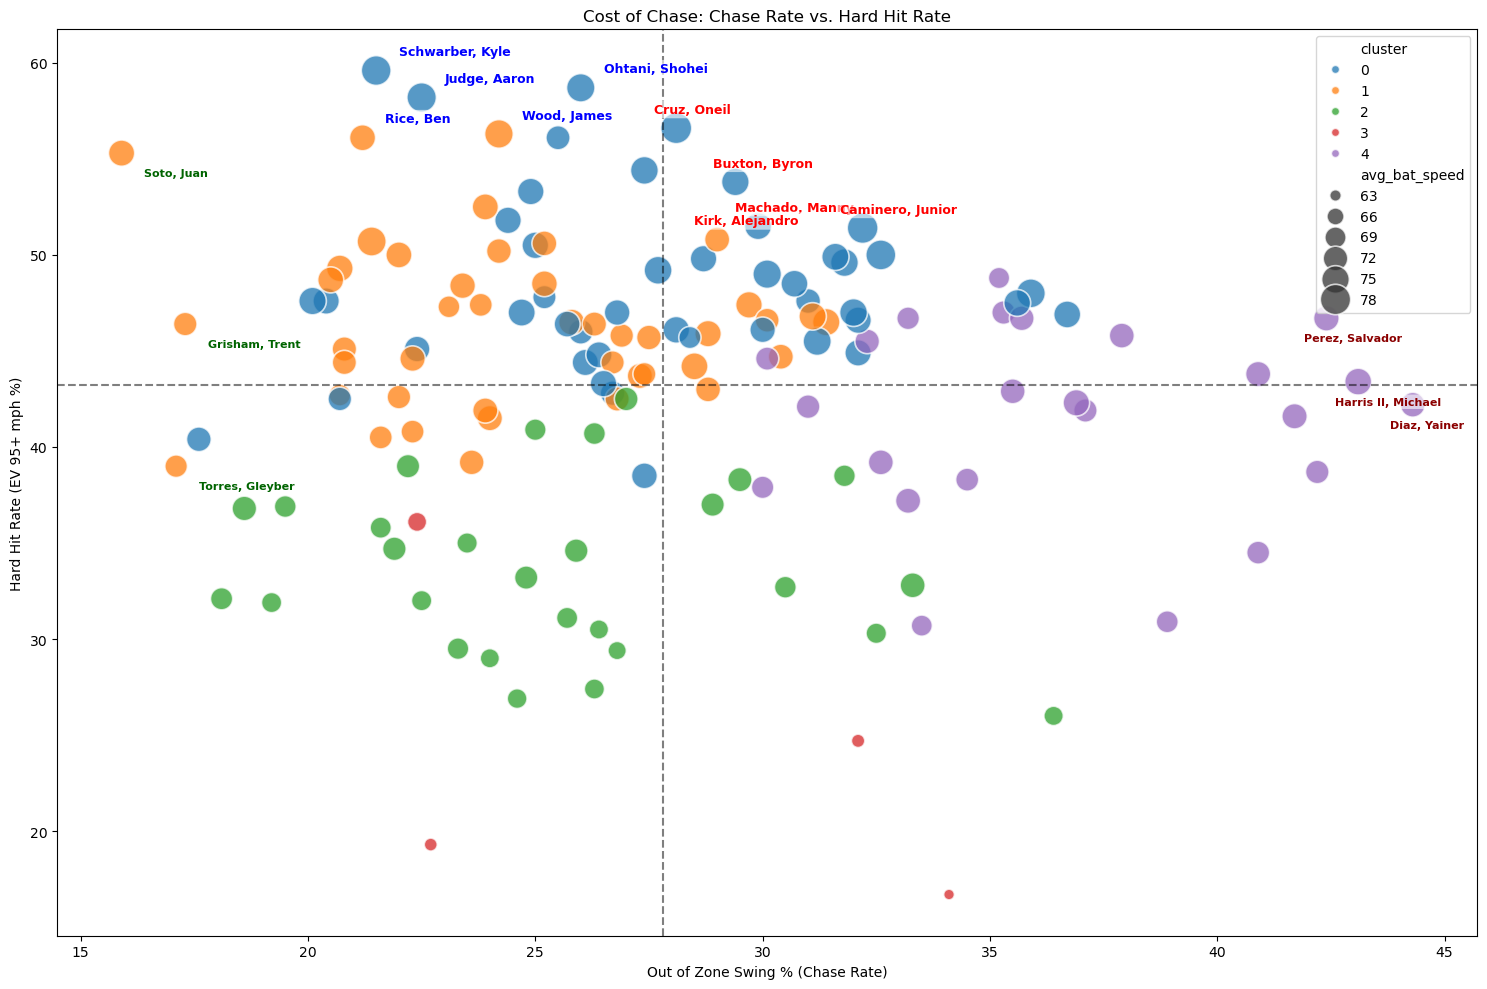

In [63]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=final_df, x='oz_swing_percent', y='ev95percent', 
                hue='cluster', palette='tab10', size='avg_bat_speed', sizes=(60, 500),  alpha=0.75, edgecolor='w')

# Add Quadrant Lines (Mean Lines)
plt.axvline(mean_chase, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(mean_power, color='black', linestyle='--', linewidth=1.5, alpha=0.5)

def label_point(df, color, position='top', font_size=9):
    for i, row in df.iterrows():
        # Dynamic offset to keep text clear of the point
        y_offset = 0.8 if position == 'top' else -1.2
        x_offset = 0.5 if row['oz_swing_percent'] < mean_chase else -0.5
        
        plt.text(
            row['oz_swing_percent'] + x_offset, 
            row['ev95percent'] + y_offset, 
            row['last_name, first_name'], 
            fontsize=font_size, fontweight='bold', color=color,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2')
        )

label_point(top_5_elite, 'blue', 'top')
label_point(top_5_bad_ball, 'red', 'top')
label_point(extreme_chasers, 'darkred', 'bottom', font_size=8)
label_point(extreme_patient, 'darkgreen', 'bottom', font_size=8)

plt.title('Cost of Chase: Chase Rate vs. Hard Hit Rate')
plt.xlabel('Out of Zone Swing % (Chase Rate)')
plt.ylabel('Hard Hit Rate (EV 95+ mph %)')
plt.tight_layout()
plt.show()

## 2-Strike Approach Analysis

In [77]:
df_2s = pd.read_csv('2-strike-bat-tracking.csv').rename(columns={'id': 'player_id'})

In [78]:
df_2s.head()

,player_id,name,swings_competitive,percent_swings_competitive,contact,avg_bat_speed,hard_swing_rate,squared_up_per_bat_contact,squared_up_per_swing,blast_per_bat_contact,blast_per_swing,swing_length,swords,batter_run_value,whiffs,whiff_per_swing,batted_ball_events,batted_ball_event_per_swing
0,691406,"Caminero, Junior",389,0.894253,302,77.711828,0.753213,0.317881,0.246787,0.228477,0.177378,8.385646,4,-4.995692,87,0.223650,158,0.406170
1,665833,"Cruz, Oneil",283,0.852410,203,76.966870,0.632509,0.300493,0.215548,0.197044,0.141343,7.660816,8,-23.195441,80,0.282686,99,0.349823
2,691023,"Walker, Jordan",219,0.883065,151,76.852587,0.671233,0.284768,0.196347,0.178808,0.123288,8.125603,4,-10.612498,68,0.310502,73,0.333333
3,656941,"Schwarber, Kyle",400,0.869565,292,76.787129,0.715000,0.335616,0.245000,0.263699,0.192500,7.523343,18,-9.566965,108,0.270000,149,0.372500
4,666176,"Adell, Jo",358,0.875306,282,76.703298,0.628492,0.258865,0.203911,0.152482,0.120112,7.566909,11,-1.730746,76,0.212291,127,0.354749


In [79]:
# Merge with season average data
comp_2s = pd.merge(
    final_df, 
    df_2s[['player_id', 'avg_bat_speed', 'swing_length', 'whiff_per_swing', 'squared_up_per_swing']], 
    on='player_id', 
    suffixes=('_avg', '_2s')
)

In [81]:
comp_2s.head()

,player_id,"last_name, first_name",avg_bat_speed_avg,swing_length_avg,squared_up_per_swing_avg,blast_per_swing,z_swing_percent,oz_swing_percent,whiff_percent,meatball_swing_percent,...,discipline_score,power_efficiency,cluster,chase_efficiency,avg_bat_speed_2s,swing_length_2s,whiff_per_swing,squared_up_per_swing_2s,delta_length_pct,delta_speed_pct
0,543807,"Springer, George",73.743485,7.500359,0.246204,0.139913,71.0,20.4,26.1,86.7,...,50.6,1.220447,0,233.333333,72.728423,7.415152,0.184127,0.222222,-1.136039,-1.376477
1,668804,"Reynolds, Bryan",72.221865,6.947734,0.240660,0.119896,73.4,26.0,29.4,83.8,...,47.4,1.262775,0,176.923077,71.480314,6.951382,0.255155,0.244845,0.052509,-1.026767
2,683737,"Busch, Michael",69.634582,7.024826,0.289054,0.130712,68.5,23.1,25.1,77.8,...,45.4,1.324055,1,204.761905,69.218081,6.993635,0.244582,0.300310,-0.444001,-0.598125
3,691016,"Soderstrom, Tyler",73.960501,7.481179,0.251303,0.158498,68.3,28.7,25.4,80.9,...,39.6,1.238499,0,173.519164,73.681415,7.524154,0.276978,0.226619,0.574450,-0.377345
4,678882,"Rafaela, Ceddanne",71.017957,7.450741,0.242754,0.104167,75.3,42.2,26.8,83.1,...,33.1,1.243348,4,91.706161,69.884129,7.392840,0.200508,0.279188,-0.777106,-1.596538


In [86]:
# Calculate Percentage Changes (Deltas)
# How much shorter is the swing?
comp_2s['delta_length_pct'] = (comp_2s['swing_length_2s'] - comp_2s['swing_length_avg']) / comp_2s['swing_length_avg'] * 100

# How much speed is sacrificed?
comp_2s['delta_speed_pct'] = (comp_2s['avg_bat_speed_2s'] - comp_2s['avg_bat_speed_avg']) / comp_2s['avg_bat_speed_avg'] * 100

# Whiff Rate Change (Absolute difference)
comp_2s['delta_whiff'] = comp_2s['whiff_per_swing'] - (comp_2s['whiff_percent'] / 100)

# How does squared-up rate change?
comp_2s['delta_squared_up'] = (comp_2s['squared_up_per_swing_2s'] - (comp_2s['squared_up_per_swing_avg'])) / comp_2s['squared_up_per_swing_avg'] * 100

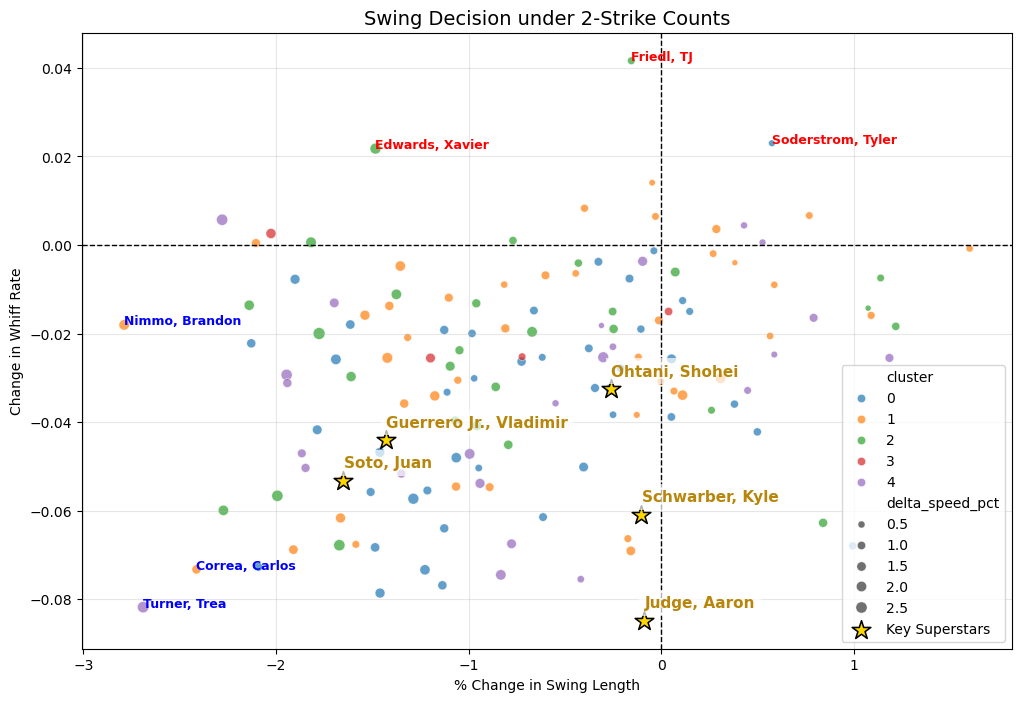

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=comp_2s, 
    x='delta_length_pct', 
    y='delta_whiff', 
    hue='cluster', 
    size=comp_2s['delta_speed_pct'].abs(), # Size represents speed sacrifice
    palette='tab10',
    alpha=0.7
)

stars_to_label = ['Judge, Aaron', 'Ohtani, Shohei', 'Soto, Juan', 'Guerrero Jr., Vladimir', 'Schwarber, Kyle']
stars_df = comp_2s[comp_2s['last_name, first_name'].isin(stars_to_label)]

# Highlight Stars with a larger, distinct marker
sns.scatterplot(data=stars_df, x='delta_length_pct', y='delta_whiff', 
                color='gold', s=200, edgecolor='black', marker='*', label='Key Superstars')

# Annotate outliers
efficient_adjusters = comp_2s.nsmallest(3, 'delta_length_pct')
stubborn_hitters = comp_2s.nlargest(3, 'delta_whiff')

labeled_names = set()

for i, row in stars_df.iterrows():
    name = row['last_name, first_name']
    if name in labeled_names:
        continue
    plt.text(row['delta_length_pct'] + 0.003, row['delta_whiff'] + 0.003, row['last_name, first_name'], 
             fontsize=11, fontweight='bold', color='darkgoldenrod', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    labeled_names.add(name)

for df, color in zip([efficient_adjusters, stubborn_hitters], ['blue', 'red']):
    for i, row in df.iterrows():
        name = row['last_name, first_name']
        if name in labeled_names:
            continue
        plt.text(row['delta_length_pct'], row['delta_whiff'], row['last_name, first_name'], 
                 fontsize=9, fontweight='bold', color=color)

plt.axhline(0, color='black', lw=1, ls='--')
plt.axvline(0, color='black', lw=1, ls='--')
plt.title('Swing Decision under 2-Strike Counts', fontsize=14)
plt.xlabel('% Change in Swing Length')
plt.ylabel('Change in Whiff Rate')
plt.grid(True, alpha=0.3)
plt.show()

## Trade-off Analysis (Whiff vs. Quality)

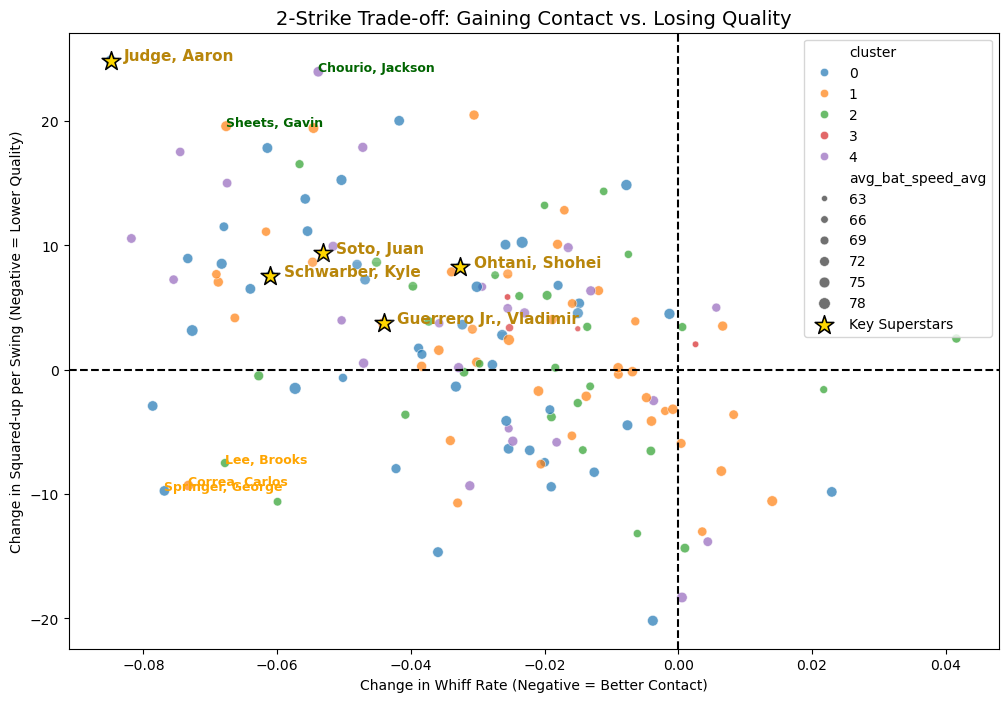

In [117]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=comp_2s,
    x='delta_whiff',
    y='delta_squared_up',
    hue='cluster',
    size='avg_bat_speed_avg', # Use original bat speed as reference
    palette='tab10',
    alpha=0.7
)

quality_retainers = comp_2s[(comp_2s['delta_whiff'] < -0.05)].nlargest(3, 'delta_squared_up')
major_sacrificers = comp_2s[(comp_2s['delta_whiff'] < -0.06)].nsmallest(3, 'delta_squared_up')

sns.scatterplot(data=stars_df, x='delta_whiff', y='delta_squared_up', 
                color='gold', s=200, edgecolor='black', marker='*', label='Key Superstars')

labeled_names = set()

for i, row in stars_df.iterrows():
    name = row['last_name, first_name']
    if name in labeled_names:
        continue
    plt.text(row['delta_whiff'] + 0.002, row['delta_squared_up'] + 0.001, row['last_name, first_name'], 
             fontsize=11, fontweight='bold', color='darkgoldenrod',
             bbox=dict(facecolor='white', alpha=0.1, edgecolor='none'))
    labeled_names.add(name)
    
for df, color in zip([quality_retainers, major_sacrificers], ['darkgreen', 'orange']):
    for i, row in df.iterrows():
        name = row['last_name, first_name']
        if name in labeled_names:
            continue
        plt.text(row['delta_whiff'], row['delta_squared_up'], row['last_name, first_name'], 
                 fontsize=9, fontweight='bold', color=color)


plt.axhline(0, color='black', lw=1.5, ls='--')
plt.axvline(0, color='black', lw=1.5, ls='--')
plt.title('2-Strike Trade-off: Gaining Contact vs. Losing Quality', fontsize=14)
plt.xlabel('Change in Whiff Rate (Negative = Better Contact)')
plt.ylabel('Change in Squared-up per Swing (Negative = Lower Quality)')
plt.show()